In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_file=("Cardiac_Outcomes.xlsx")
all_sheets=pd.read_excel(data_file,sheet_name=None)
#to access sheet by name in excel
Hospital_data=all_sheets['Hospitalization_Discharge']
Cardiac_data=all_sheets['CardiacComplications']
Response_data=all_sheets['Responsivenes']
Patient_data=all_sheets['PatientHistory']
lab_data=all_sheets['Labs']
Demography_data=all_sheets['Demography']
Patientpre_data=all_sheets['Patient_Precriptions']
print(data_file)


Cardiac_Outcomes.xlsx


In [4]:
pip install scikit-learn

# 53) What is the correlation between CCI score and outcome?

In [11]:
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
merged=pd.merge(Hospital_data, Patient_data , on='inpatient_number')
merged=merged.replace([float('inf'), -float('inf')],pd.NA).dropna()
label=LabelEncoder()
merged['encoded']=label.fit_transform(merged['outcome_during_hospitalization'])
if len(merged['encoded'])>=2 and len(merged['CCI_score'])>=2:
   correlation,value=pearsonr(merged['encoded'],merged['CCI_score'])
   print('correlation',correlation)
else:
   print("Both arrays must have length atleast 2 to correlate")


Both arrays must have length atleast 2 to correlate


# 2) Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

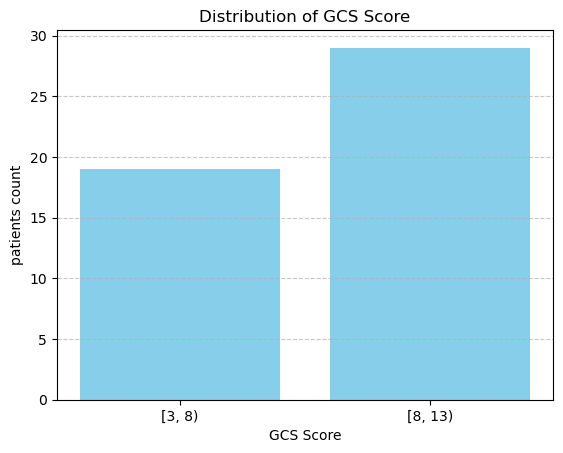

In [22]:
slab=pd.cut(Response_data['GCS'],bins=range(3,16,5), right=False)
scores=slab.value_counts().sort_index()
plt.bar(scores.index.astype(str),scores.values,color='skyblue')
plt.xlabel('GCS Score')
plt.ylabel('patients count')
plt.title('Distribution of GCS Score')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.show()
            

# 6) What was the average age group of the patients that had an outcome of 'Alive'?

In [23]:
#merged=pd.merge(Hospital_data, Demography_data , on='inpatient_number')
import seaborn as sns
import matplotlib.pyplot as plt
def Random_Age(age):
 return pd.Series(age.split("-", 1))
Demography_data[['Age1', 'Age2']] = Demography_data['ageCat'].apply(Random_Age)  
Demography_data['Age'] = [np.random.randint(s, e) for s,e in zip(Demography_data['Age1'], Demography_data['Age2'])]
del Demography_data['Age1']
del Demography_data['Age2']
merged=pd.merge(Hospital_data, Demography_data , on='inpatient_number')
alive=merged[merged['outcome_during_hospitalization']=='Alive']
average_age=alive['Age'].mean()
print("average age of patients with outcome alive",round(average_age,2))


average age of patients with outcome alive 73.95
